In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/RidwendDev/Magang-AI-Komatik-2023/main/penguins.csv")

In [ ]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
duplicate_entries = penguins[penguins.duplicated()]
duplicate_entries.shape

(0, 7)

In [ ]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
print('Unique kolom species:', penguins['species'].unique())
print('Unique kolom island:', penguins['island'].unique())
print('Unique Kolom sex:', penguins['sex'].unique())

Unique kolom species: ['Adelie' 'Chinstrap' 'Gentoo']
Unique kolom island: ['Torgersen' 'Biscoe' 'Dream']
Unique Kolom sex: ['MALE' 'FEMALE' nan '.']


In [ ]:
penguins['culmen_length_mm'] = penguins['culmen_length_mm'].fillna(value = penguins['culmen_length_mm'].mean())
penguins['culmen_depth_mm'] = penguins['culmen_depth_mm'].fillna(value = penguins['culmen_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value = penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value = penguins['body_mass_g'].mean())
penguins['sex'] = penguins['sex'].fillna('MALE')

In [ ]:
penguins[penguins['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
penguins.loc[336,'sex'] = 'MALE'
print('Unique Kolom sex:', penguins['sex'].unique())

Unique Kolom sex: ['MALE' 'FEMALE']


In [ ]:
penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# ANALISIS KATEGORIKAL
print('Jumlah Penguin per spesies:\n')
print(penguins['species'].value_counts())
print('')
print('Jumlah Penguin per pulau:\n')
print(penguins['island'].value_counts())
print(" ")
print(" ")
print(" ")
print('Melihat berdasarkan jenis kelamin')
print(penguins.groupby(['species', 'sex'])['sex'].count())
print('')
print('')
print(penguins.groupby(['island', 'sex'])['sex'].count())
print('')
print('')
print(penguins.groupby(['sex'])['sex'].count())
print('')
print('')
print(penguins.groupby(['species', 'island'])['island'].count())

Jumlah Penguin per spesies:

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Jumlah Penguin per pulau:

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
 
 
 
Melihat berdasarkan jenis kelamin
species    sex   
Adelie     FEMALE    73
           MALE      79
Chinstrap  FEMALE    34
           MALE      34
Gentoo     FEMALE    58
           MALE      66
Name: sex, dtype: int64


island     sex   
Biscoe     FEMALE    80
           MALE      88
Dream      FEMALE    61
           MALE      63
Torgersen  FEMALE    24
           MALE      28
Name: sex, dtype: int64


sex
FEMALE    165
MALE      179
Name: sex, dtype: int64


species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64


Kesimpulan dari analisis kategorikal :
1. Spesies bernama Adelie adalah spesies dengan jumlah penguin terbanyak
2. Pulau Biscoe adalah pulau dengan pinguin terbanyak
3. Penguin jantan lebih banyak dari penguin betina
4. Penguins jenis Adelie tersebar diseluruh pulau yang ada yaitu Biscoe, Dream, dan Torgersen

BERDASARKAN SPESIES


Text(0.5, 1.0, 'Berat Penguin Berdasarkan Spesies\n')

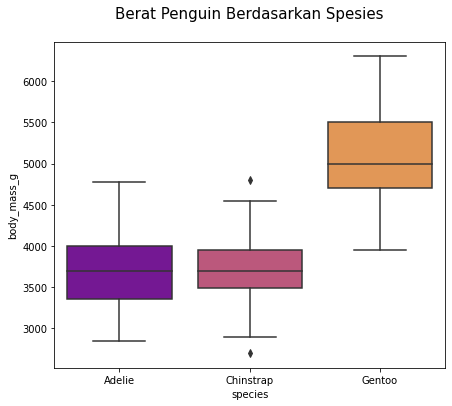

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.species, y=penguins.body_mass_g, palette='plasma')
plt.title('Berat Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Culmen Penguin Berdasarkan Spesies\n')

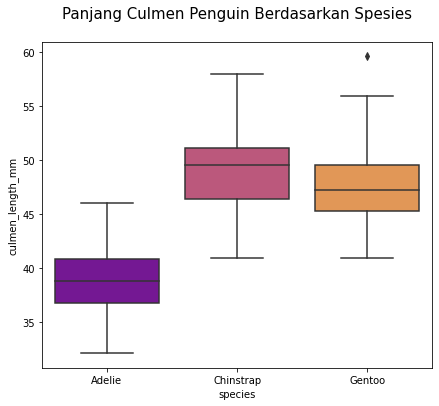

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.species, y=penguins.culmen_length_mm, palette='plasma')
plt.title('Panjang Culmen Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Spesies\n')

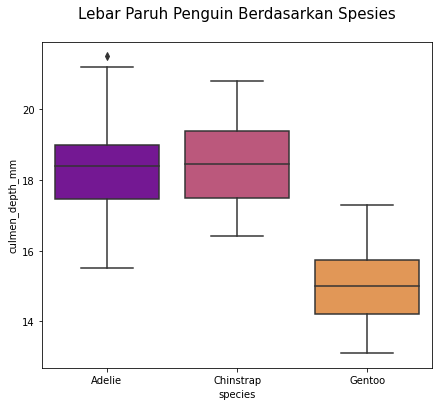

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.species, y=penguins.culmen_depth_mm, palette='plasma')
plt.title('Lebar Paruh Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Spesies\n')

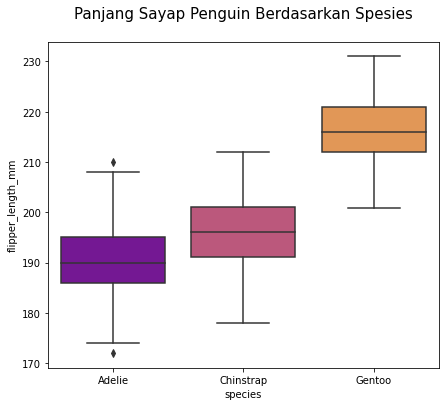

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.species, y=penguins.	flipper_length_mm, palette='plasma')
plt.title('Panjang Sayap Penguin Berdasarkan Spesies\n', fontsize=15)


BERDASARKAN PULAU


Text(0.5, 1.0, 'Berat Badan Penguin Berdasarkan Pulau\n')

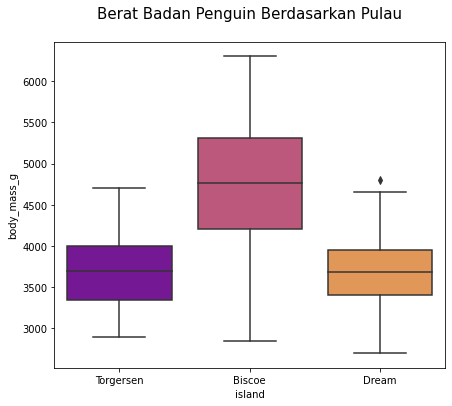

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.island, y=penguins.	body_mass_g, palette='plasma')
plt.title('Berat Badan Penguin Berdasarkan Pulau\n', fontsize=15)


Text(0.5, 1.0, 'Panjang Paruh Penguin Berdasarkan Pulau\n')

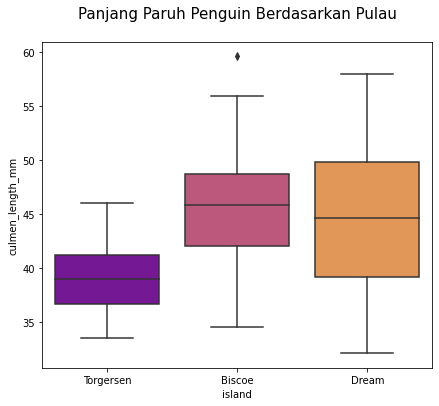

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.island, y=penguins. culmen_length_mm, palette='plasma')
plt.title('Panjang Paruh Penguin Berdasarkan Pulau\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Pulau\n')

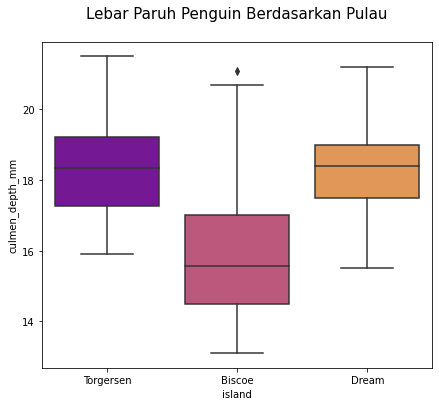

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.island, y=penguins. culmen_depth_mm, palette='plasma')
plt.title('Lebar Paruh Penguin Berdasarkan Pulau\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Pulau\n')

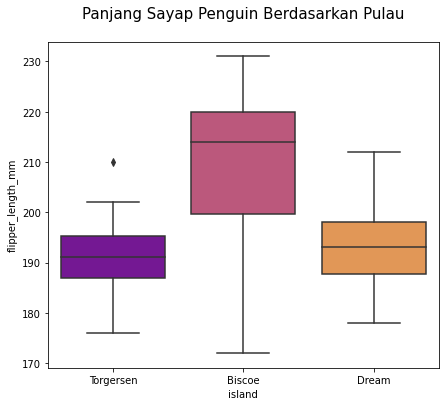

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.island, y=penguins. flipper_length_mm, palette='plasma')
plt.title('Panjang Sayap Penguin Berdasarkan Pulau\n', fontsize=15)

BERDASARKAN SEX


Text(0.5, 1.0, 'Berat Badan Penguin Berdasarkan Jenis Kelamin\n')

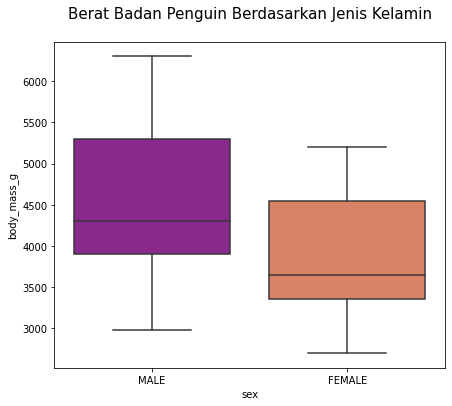

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.sex, y=penguins. body_mass_g, palette='plasma')
plt.title('Berat Badan Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Paruh Penguin Berdasarkan Jenis Kelamin\n')

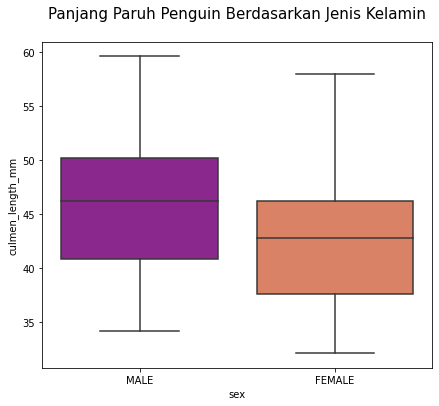

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.sex, y=penguins. culmen_length_mm, palette='plasma')
plt.title('Panjang Paruh Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Jenis Kelamin\n')

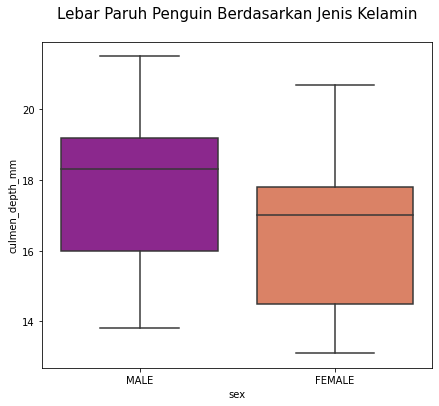

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.sex, y=penguins. culmen_depth_mm, palette='plasma')
plt.title('Lebar Paruh Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Jenis Kelamin\n')

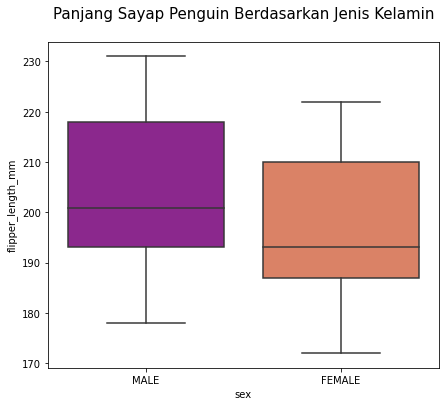

In [ ]:
plt.figure(figsize= (7,6))
sns.boxplot(x=penguins.sex, y=penguins. flipper_length_mm, palette='plasma')
plt.title('Panjang Sayap Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

**ANALISIS** **KATEGORIAL**

BERDASARKAN JENIS KELAMIN



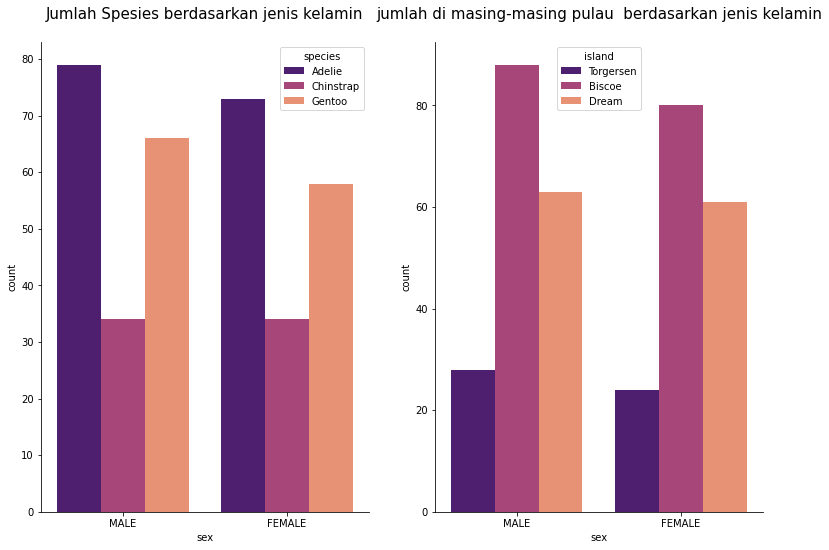

In [ ]:
fig = plt.figure(figsize=(20,19))
gs = fig.add_gridspec(2,3)
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='sex', hue='species', data=penguins, ax=ax_sex, palette='magma')
plt.title('Jumlah Spesies berdasarkan jenis kelamin\n', fontsize=15)
sns.despine()
ax_sex2 = fig.add_subplot(gs[0,1])
sns.countplot(x='sex', hue='island', data=penguins, ax=ax_sex2, palette='magma')
plt.title('jumlah di masing-masing pulau  berdasarkan jenis kelamin\n', fontsize=15)
sns.despine()

KESIMPULAN :
1. Jumlah masing-masing spesies yang berjenis kelamin jantan lebih banyak dari yang berjenis kelamin betina
2. Masing- masing pulau memiliki jumlah spesies yang berjenis kelamin jantan lebih banyak daripada betina

BERDASARKAN PULAU

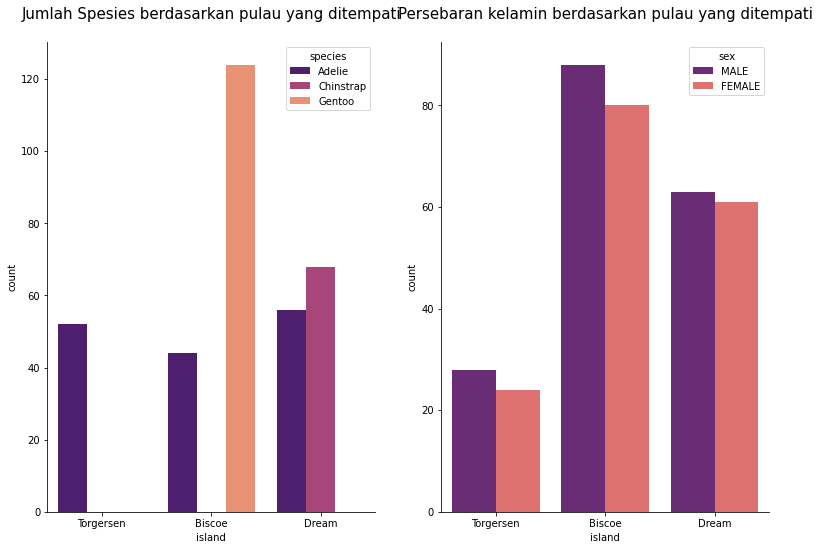

In [ ]:
fig = plt.figure(figsize=(20,19))
gs = fig.add_gridspec(2,3)
ax_island = fig.add_subplot(gs[0,0])
sns.countplot(x='island', hue='species', data=penguins, ax=ax_island, palette='magma')
plt.title('Jumlah Spesies berdasarkan pulau yang ditempati\n', fontsize=15)
sns.despine()
ax_island2 = fig.add_subplot(gs[0,1])
sns.countplot(x='island', hue='sex', data=penguins, ax=ax_island2, palette='magma')
plt.title('Persebaran kelamin berdasarkan pulau yang ditempati\n', fontsize=15)
sns.despine()

KESIMPULAN :
1. Pulau Biscoe memiliki jumlah spesies terbanyak terbanyak
2. Pada Pulau Torgersen, jumlah hewan berjenis kelamin pria lebih banyak
3. Pada Pulau Biscoe, jumlah hewan berjenis kelamin pria lebih banyak
4. Pada Pulau Dream, jumlah hewan berjenis kelamin pria lebih banyak
5. seluruh spesies Gentoo mendiami pulau Biscoe

BERDASARKAN SPESIES

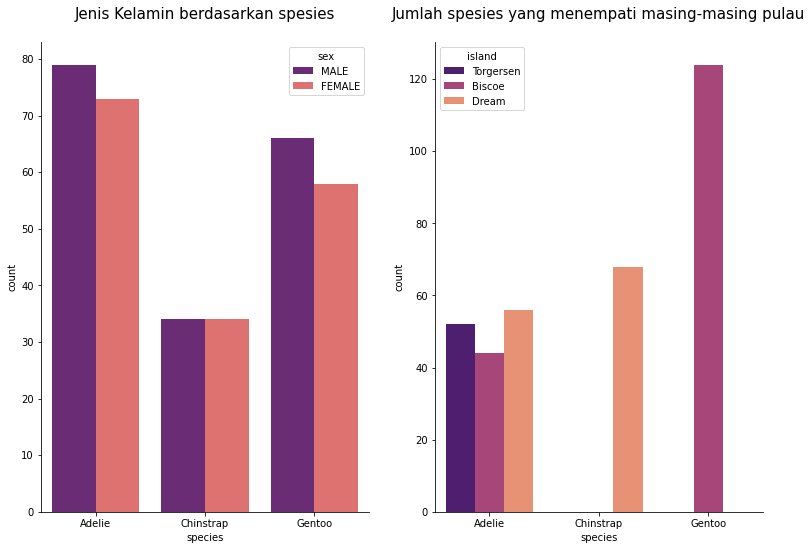

In [ ]:
fig = plt.figure(figsize=(20,19))
gs = fig.add_gridspec(2,3)
ax_spesies = fig.add_subplot(gs[0,0])
sns.countplot(x='species', hue='sex', data=penguins, ax=ax_spesies, palette='magma')
plt.title('Jenis Kelamin berdasarkan spesies\n', fontsize=15)
sns.despine()
ax_spesies2 = fig.add_subplot(gs[0,1])
sns.countplot(x='species', hue='island', data=penguins, ax=ax_spesies2, palette='magma')
plt.title('Jumlah spesies yang menempati masing-masing pulau\n', fontsize=15)
sns.despine()

Kesimpulan :
1. Spesies Adelie memiliki jumlah  terbanyak baik jantan maupun betina
2. Spesies Adelie menempati ketiga pulau
3. Spesies Chinstrap hanya menempati pulau Dream
4. spesies Gentoo hanya menempati pulau Biscoe  

**ANALISIS NUMERIKAL**

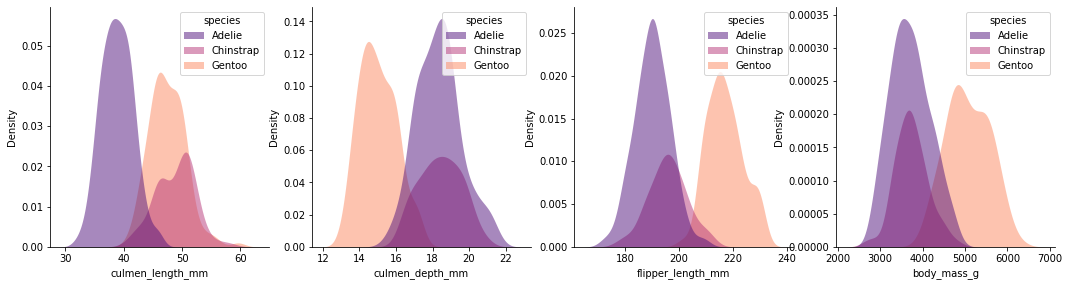

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,4)
ax_c_lenght = fig.add_subplot(gs[0,0])
sns.kdeplot(x='culmen_length_mm', hue='species', data=penguins, fill=True, alpha=.5, linewidth=0, ax=ax_c_lenght, palette='magma', shade=True)
sns.despine()
ax_c_depth = fig.add_subplot(gs[0,1])
sns.kdeplot(x='culmen_depth_mm', hue='species', data=penguins, fill=True, alpha=.5, linewidth=0, ax=ax_c_depth, palette='magma', shade=True)
sns.despine()
ax_f_length = fig.add_subplot(gs[0,2])
sns.kdeplot(x='flipper_length_mm', hue='species', data=penguins, fill=True, alpha=.5, linewidth=0, ax=ax_f_length, palette='magma', shade=True)
sns.despine()
ax_b_mass = fig.add_subplot(gs[0,3])
sns.kdeplot(x='body_mass_g', hue='species', data=penguins, fill=True, alpha=.5, linewidth=0, ax=ax_b_mass, palette='magma', shade=True)
sns.despine()

<Figure size 1296x1080 with 0 Axes>

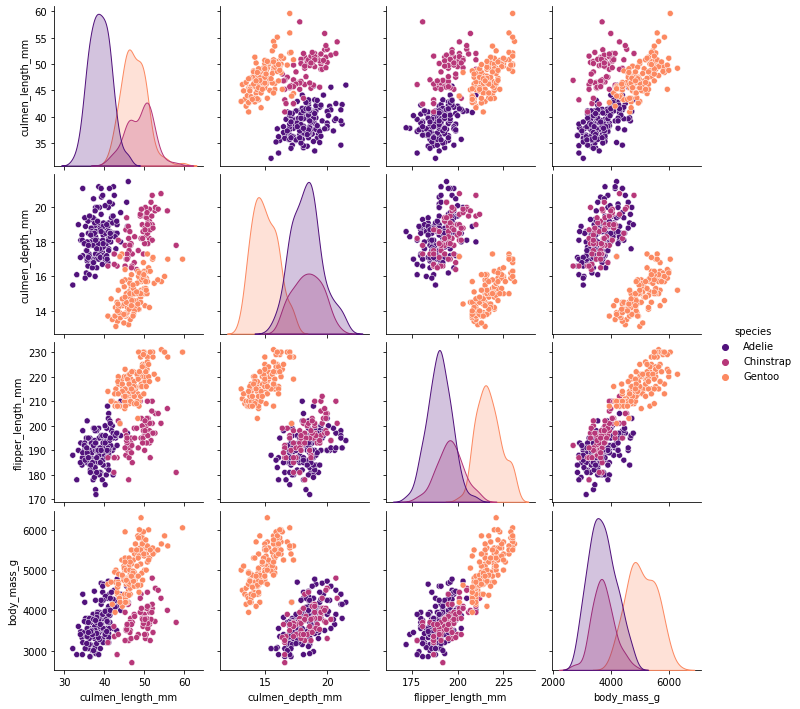

In [ ]:
plt.figure(figsize=(18,15))
sns.pairplot(data=penguins, hue='species', palette='magma')
plt.show()

Kesimpulan :
1. Penguin Adelie memiliki panjang paruh paling pendek namun memiliki lebar paruh yang hampir sama dengan penguin Chinstrap
2. Penguin Gentoo memiliki panjang paruh yang hampir sama dengan penguin Chinstrap namun lebar paruhnya yang terpendek dari yang lainnya.
3. Penguin Gentoo memiliki rata-rata panjang sayap terpanjang dan berat badan terberat.


## ***KESIMPULAN KESELURUHAN***
1. Penguin Adelie memiliki panjang paruh terpendek, lebar paruh palinh lebar dan memiliki berat badan lebih ringan dari penguin Gentoo serta berhabitat di seluruh pulau.
2. Penguin Chinstrap memiliki panjang paruh yang paling panjang, lebar paruh paling lebar dan memiliki berat badan lebih ringan dari penguin Gentoo serta berhabitat hanya di Pulau Dream.
3. Penguin Gentoo memiliki panjang paruh yang hampir sama dengan Penguin Chinstrap, lebar paruh terkecil, memiliki berat badan paling berat dari, berhabitat hanya di Pulau Biscoe, dan panjang sayapnya terpanjang